# Part I - (Dataset Exploration)
## by Alaa Armoush

## Introduction

**Dataset:** The Prosper Loan Data dataset contains detailed information on 113,937 loans, each described by 81 variables. These variables include loan amount, borrower rate (interest rate), current loan status, borrower income, and more.

**Project questions:**
1. What is the distribution of loan amounts and borrower interest rates?
2. How does borrower income relate to interest rate and loan status?
3. Are there patterns in loan outcomes across borrower credit grades?

## Preliminary Wrangling

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the data
df = pd.read_csv('prosperLoanData.csv')

# Overview
print(df.shape)
df.info()
df.head()
df['BorrowerState'].unique()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [21]:
def add_title_and_labels(title, xlabel, ylabel):
    """
    Function to add title and axis labels to a plot.
    """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### The Dataset Structure

113,937 rows × 81 columns, with mixed numeric and categorical features.

### Main features of interest

LoanOriginalAmount, BorrowerRate, StatedMonthlyIncome, ListingCategory (CreditGrade), LoanStatus

### Supporting features

ProsperRating (Alpha), Term, EmploymentStatus, DebtToIncomeRatio

## Univariate Exploration



### 1. Distribution of Borrower Interest Rates
#### Q: How are `BorrowerRate` values distributed?


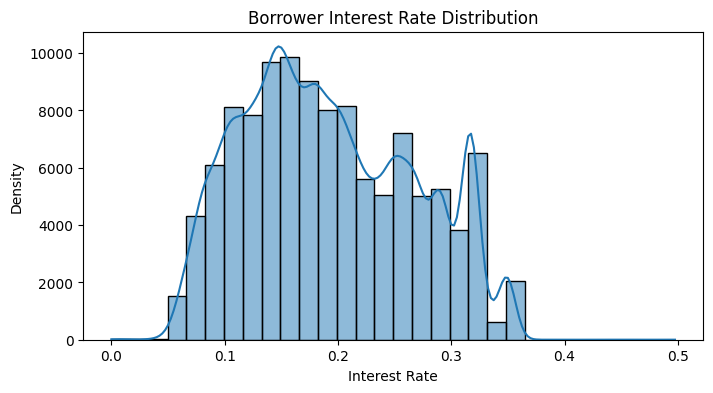

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['BorrowerRate'], bins=30, kde=True)
add_title_and_labels('Borrower Interest Rate Distribution', 'Interest Rate' , 'Density')
plt.show()

#### Observations:

- Interest rates range roughly from 5% to 35%.
- peak around 15–20%.
- No significant outliers are observed.

### 2. Distribution of Borrower State
#### Q: What are the Top 15 States by Prosper Loans per 1,000 Capita?

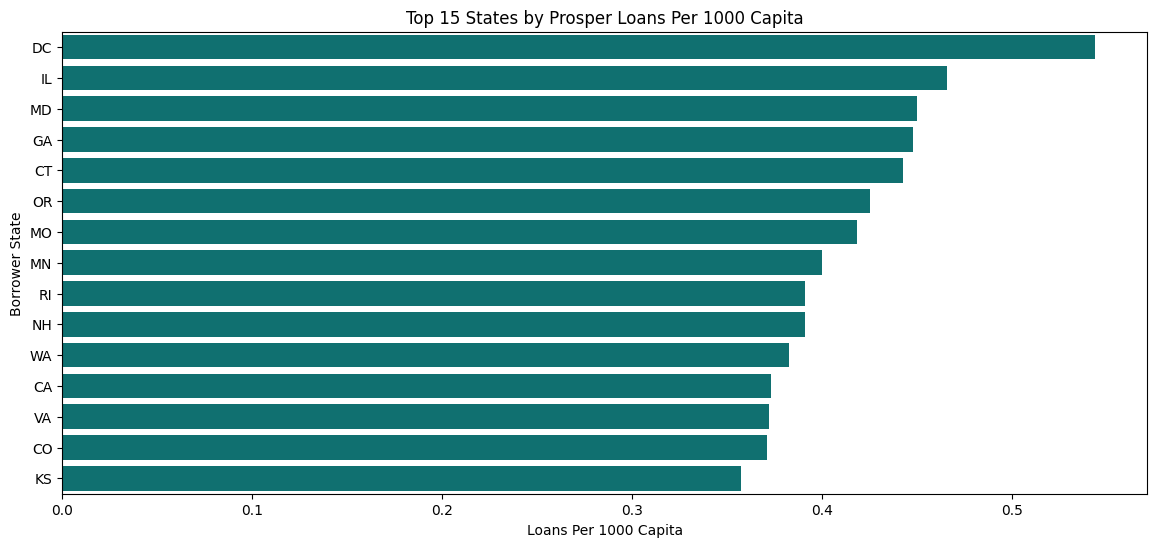

In [23]:
# Source: World Population Review / Britannica (approximate values)
state_populations = {
    'CA': 39431.263, 'TX': 31290.831, 'FL': 23372.215, 'NY': 19867.248,
    'PA': 13078.751, 'IL': 12710.158, 'OH': 11883.304, 'GA': 11180.878,
    'NC': 11046.024, 'MI': 10140.459, 'NJ': 9500.851, 'VA': 8811.195,
    'WA': 7958.180, 'AZ': 7582.384, 'MA': 7136.171, 'TN': 7227.750,
    'IN': 6924.275, 'MD': 6263.220, 'MO': 6245.466, 'CO': 5957.493,
    'WI': 5960.975, 'MN': 5793.151, 'SC': 5478.831, 'AL': 5157.699,
    'LA': 4597.740, 'KY': 4588.372, 'OR': 4272.371, 'OK': 4095.393,
    'CT': 3675.069, 'UT': 3503.613, 'IA': 3241.488, 'NV': 3267.467,
    'AR': 3088.354, 'MS': 2943.045, 'KS': 2970.606, 'NM': 2130.256,
    'NE': 2005.465, 'ID': 2001.619, 'WV': 1769.979, 'HI': 1446.146,
    'NH': 1409.032, 'ME': 1405.012, 'MT': 1137.233, 'RI': 1112.308,
    'DE': 1051.917, 'SD': 924.669, 'ND': 796.568, 'AK': 740.133,
    'VT': 648.493, 'WY': 587.618,
    'DC': 702.0
}

# Convert populations to actual numbers (multiply by 1000)
state_populations = {k: v * 1000 for k, v in state_populations.items()}

# Calculate the number of loans per state
loan_counts = df['BorrowerState'].value_counts()

# Create a DataFrame for loans per capita
loans_per_capita = pd.DataFrame({
    'State': loan_counts.index,
    'LoanCount': loan_counts.values
})

# Add population to the DataFrame
loans_per_capita['Population'] = loans_per_capita['State'].map(state_populations)

# Filter out states where population data might be missing or state is not recognized
loans_per_capita.dropna(subset=['Population'], inplace=True)

# Calculate loans per capita (per 1000 people for better readability)
loans_per_capita['LoansPer1000Capita'] = (loans_per_capita['LoanCount'] / loans_per_capita['Population']) * 1000

# Sort and get the top 15 states by loans per capita
top_15_per_capita = loans_per_capita.sort_values(by='LoansPer1000Capita', ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(data=top_15_per_capita, y='State', x='LoansPer1000Capita', color='teal')
add_title_and_labels('Top 15 States by Prosper Loans Per 1000 Capita', 'Loans Per 1000 Capita', 'Borrower State')
plt.show()


#### Observations:

- Highest Per Capita: Washington D.C. `(DC)` leads significantly in loans per 1000 residents.

- Top Tier: Illinois `(IL)`, Maryland `(MD)`, Georgia `(GA)`, and Connecticut `(CT)` follow with high per capita loan activity.

- Mid-Tier: Oregon `(OR)`, Missouri `(MO)`, and Minnesota `(MN)` show moderate per capita loan rates.

- Lower Among Top 15: Larger states like California `(CA)` and Virginia `(VA)` have lower per capita rates within this top group.

- Distribution: Prosper loan activity per capita varies notably across states.

## Bivariate Exploration

### 1. Borrower Income vs. Interest Rate
#### Q: How does `StatedMonthlyIncome` relate to `BorrowerRate`

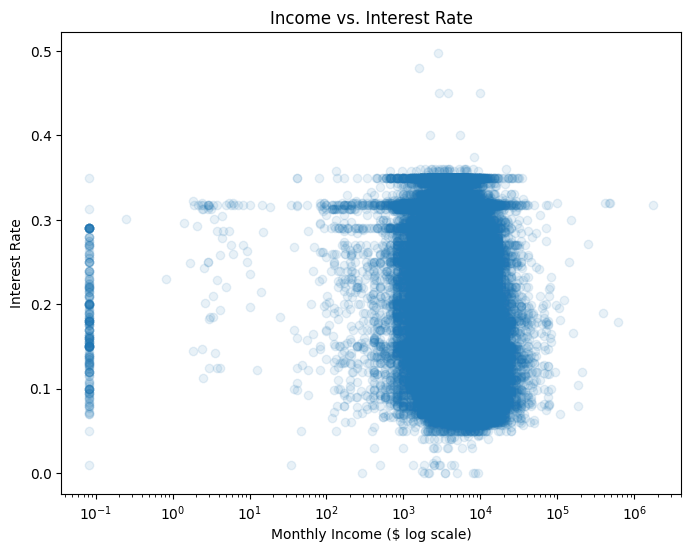

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(df['StatedMonthlyIncome'], df['BorrowerRate'], alpha=1/10)
plt.xscale('log')
add_title_and_labels('Income vs. Interest Rate', 'Monthly Income ($ log scale)','Interest Rate' )
plt.show()

#### Observation:
- Inverse Relationship: Higher monthly income generally correlates with lower interest rates.

- Income Concentration: Most borrowers fall between `$1000` and `$10,000` monthly income.

- Interest Rate Spread: Significant variation in interest rates exists even within similar income brackets, typically from 5% to 35%.

### 2. Credit Grade vs. Loan Amount 
#### Q: Do different `ProsperRating (Alpha)` grades borrow different amounts?

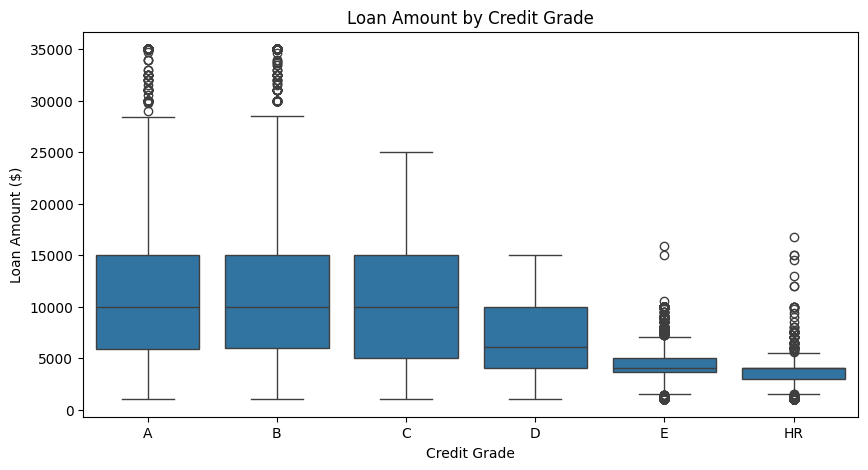

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', order=['A','B','C','D','E','HR'])
add_title_and_labels('Loan Amount by Credit Grade', 'Credit Grade', 'Loan Amount ($)')
plt.show()

#### Observations:

- Credit Grade vs. Amount: Higher credit grades borrow significantly larger loan amounts; lower grades borrow less.
- Median Amounts: Medians decrease consistently from 'A'/'B' (around `$10,000`) down to 'HR' (around `$4,000`).
- Loan Amount Spread: Higher grades (A, B, C) show a wider range of borrowed amounts; lower grades have a narrower, smaller range.
- Maximums/Outliers: 'A' and 'B' grades have the highest maximum loans and more high-value outliers, reaching $35,000.

### 3. Monthly Income by Credit Grade
#### Q: How does the distribution of `StatedMonthlyIncome` vary across `ProsperRating (Alpha) grades`?

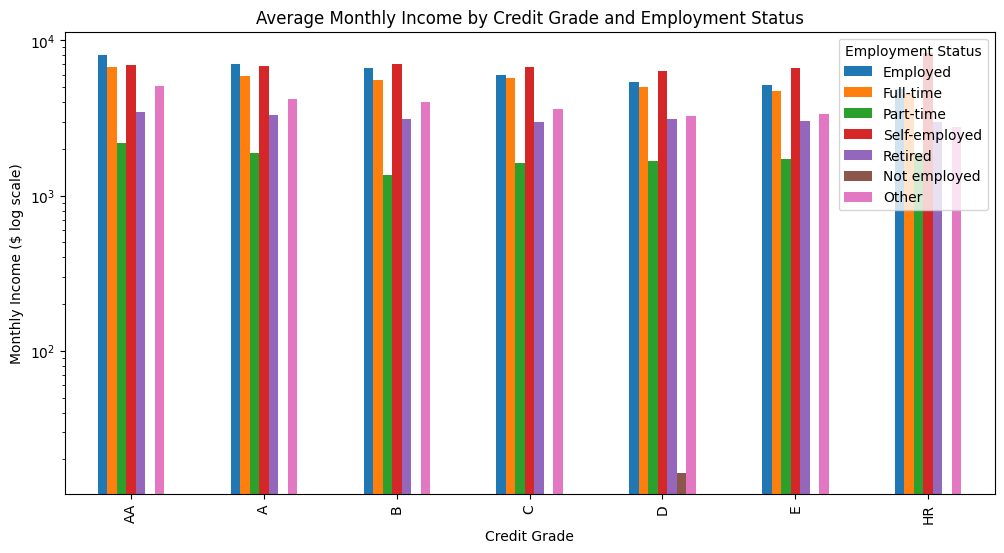

In [30]:
employment_order = [
    'Employed',
    'Full-time',
    'Part-time',
    'Self-employed',
    'Retired',
    'Not employed',
    'Other'
]

# 2. Create categorical dtype
employment_cat = pd.api.types.CategoricalDtype(
    categories=employment_order,
    ordered=True
)

# 3. Apply to column
df['EmploymentStatus'] = df['EmploymentStatus'].astype(employment_cat)

# 4. Group and pivot — the order will now be respected!
summary = (
    df.groupby(
        ['ProsperRating (Alpha)', 'EmploymentStatus'],
        observed=True
    )['StatedMonthlyIncome']
    .mean()
    .reset_index()
)

summary_pivot = summary.pivot(
    index='ProsperRating (Alpha)',
    columns='EmploymentStatus',
    values='StatedMonthlyIncome'
).reindex(grade_order)

# 5. Plot
summary_pivot.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.yscale('log')
add_title_and_labels(
    'Average Monthly Income by Credit Grade and Employment Status',
    'Credit Grade',
    'Monthly Income ($ log scale)'
)
plt.legend(title='Employment Status')
plt.show()

#### Observations:

- Income vs. Grade: Higher credit grades (AA, A) are associated with higher monthly incomes; lower grades (E, HR) with lower incomes.
- Median Income Trend: Median income consistently decreases as credit grade moves from 'AA' to 'HR'.
- Income Spread: Higher grades show a wider distribution of incomes; lower grades have a narrower range.
- HR Grade Income: The 'HR' grade's income distribution is very compact and concentrated at the lowest income levels.

## Multivariate Exploration

### 1. Income, Rate & Credit Grade
#### Q: How do income and rate interact by `ProsperRating (Alpha)`?

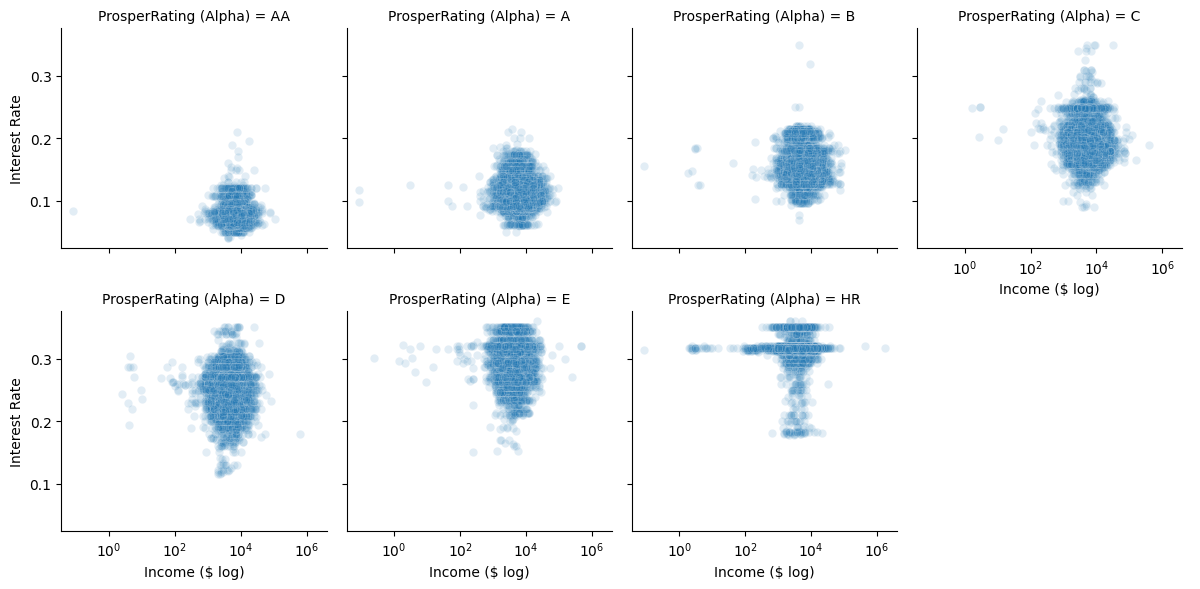

In [31]:
grade_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
g = sns.FacetGrid(df, col='ProsperRating (Alpha)', col_wrap=4, col_order=grade_order)
g.map(sns.scatterplot, 'StatedMonthlyIncome', 'BorrowerRate', alpha=1/8)
for ax in g.axes.flatten():
    ax.set_xscale('log')
    ax.set_xlabel('Income ($ log)')
    ax.set_ylabel('Interest Rate')
g.add_legend()
plt.tight_layout()
plt.show()

#### Observations:

- Credit Grade & Rates: Higher credit grades (AA, A, B) have lower interest rates; lower grades (E, HR) have higher rates.
- Rate Ranges: Each credit grade shows a distinct, narrower range of interest rates.
- Income & Grades: Higher credit grades tend to be associated with higher incomes; lower grades with lower incomes.
- HR Grade Anomaly: The 'HR' grade shows a notable cluster of low-income borrowers with very high, yet varied, interest rates.

### 2. Distribution of Loan Amounts
#### Q: What does the distribution of `LoanOriginalAmount` look like?

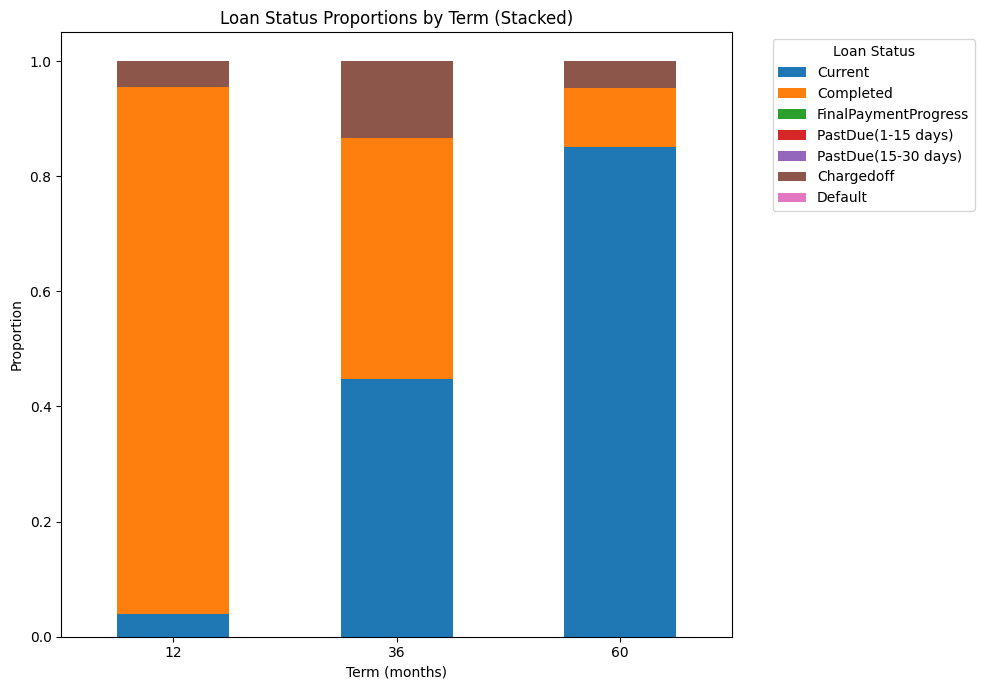

In [32]:
# 1. Define desired order
loan_status_order = [
    'Current', 
    'Completed', 
    'FinalPaymentProgress',
    'PastDue(1-15 days)', 
    'PastDue(15-30 days)', 
    # Add other intermediate statuses here in the correct position
    'Chargedoff', 
    'Default'
]

# 2. Convert LoanStatus to ordered categorical
loan_status_cat = pd.api.types.CategoricalDtype(
    categories=loan_status_order, 
    ordered=True
)
df['LoanStatus'] = df['LoanStatus'].astype(loan_status_cat)

# 3. Group and calculate proportions
loan_status_proportions = (
    df.groupby('Term')['LoanStatus']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    [loan_status_order]  # Explicitly order columns after unstack
)

# 4. Plot
loan_status_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7)
)
add_title_and_labels('Loan Status Proportions by Term (Stacked)', 'Term (months)', 'Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Observations:

- 12-Month Term: Over 90% of loans are 'Completed'; lowest risk.
- 36-Month Term: About 50-55% 'Current', 30-35% 'Completed'; highest proportion of 'Defaulted' loans (12%).
- 60-Month Term: Largest proportion of 'Current' loans (80-85%).
- Term vs. Status: Longer terms mean fewer 'Completed' loans and more 'Current' loans.

### 3. Selected Numeric Features
#### Q: What are pairwise relationships among `LoanOriginalAmount`, `BorrowerRate`, `StatedMonthlyIncome`?

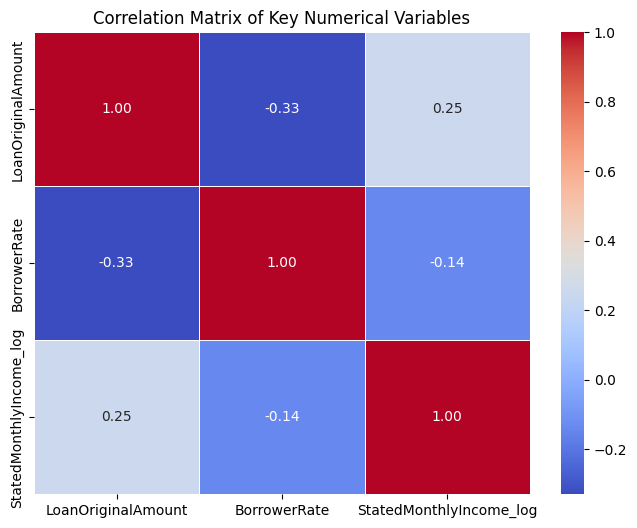

In [33]:
numerical_cols = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome_log']
df_transformed = df.copy()
df_transformed['StatedMonthlyIncome_log'] = np.log1p(df_transformed['StatedMonthlyIncome'])
correlation_matrix = df_transformed[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

#### Observations:

- Loan Amount & Rate: Moderate negative correlation (-0.33); larger loans have lower rates.
- Income & Rate: Weak negative correlation (-0.14); higher income have slightly lowers rates.
- Income & Loan Amount: Weak positive correlation (0.25); higher income slightly correlates with larger loans.

## Conclusions
This exploratory analysis uncovered core insights into Prosper loan data. Initial distributions showed LoanOriginalAmount was right-skewed, BorrowerRate peaked around 15-20%, and StatedMonthlyIncome required log-transformation for clarity.

Key relationships emerged:

- Higher income generally led to lower `BorrowerRate`.

- 12-month loans had the highest completion rates; 36-month loans saw most defaults; 60-month terms had the highest current and charged-off proportions.

- Better `ProsperRating (Alpha)` correlated with larger `LoanOriginalAmount`. Furthermore, higher `ProsperRating (Alpha)` grades were consistently associated with higher `StatedMonthlyIncome`, with income distributions becoming lower and narrower for poorer credit grades.

- `ProsperRating (Alpha)` strongly segmented `BorrowerRate`, with higher grades consistently receiving lower rates, and vice-versa, confirming its importance. Correlations highlighted a moderate inverse relationship between `LoanOriginalAmount` and `BorrowerRate`. `StatedMonthlyIncome` showed weaker correlations with both `LoanOriginalAmount` and `BorrowerRate`. The exploration effectively used data transformations and multi-variable visualizations to reveal these patterns.